In [1]:
import pandas as pd
sales_data = pd.read_csv('grouped sales data.csv')
trends_data_after_2015 = pd.read_csv('trends data after 2015.csv')
trends_data_before_2015 = pd.read_csv('trends data before 2015.csv')

In [2]:
trends_data_after_2015

,date,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
0,2015-03-01,18,9,28,19,False
1,2015-04-01,68,58,20,10,False
2,2015-05-01,36,63,37,0,False
3,2015-06-01,48,0,48,10,False
4,2015-07-01,45,27,55,18,False
...,...,...,...,...,...,...
80,2021-11-01,41,0,34,8,False
81,2021-12-01,25,0,17,9,False
82,2022-01-01,31,8,39,16,False
83,2022-02-01,45,0,46,9,False


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
grp_by_time = sales_data.groupby(['Delivery Date'])['Quantity in L'].sum().reset_index()
grp_by_time = grp_by_time.sort_values(by=['Delivery Date'])
grp_by_time

,Delivery Date,Quantity in L
0,2009-01,1678.000
1,2009-11,1100.000
2,2009-12,29086.000
3,2010-01,12607174.840
4,2010-02,17669239.516
...,...,...
138,2021-04,8912430.590
139,2021-05,838912.214
140,2021-06,127100.000
141,2021-07,4000.000


In [4]:
grp_by_time = grp_by_time.iloc[1: , :]
grp_by_time

,Delivery Date,Quantity in L
1,2009-11,1100.000
2,2009-12,29086.000
3,2010-01,12607174.840
4,2010-02,17669239.516
5,2010-03,19879116.681
...,...,...
138,2021-04,8912430.590
139,2021-05,838912.214
140,2021-06,127100.000
141,2021-07,4000.000


In [5]:
grp_by_time['Quantity in L'].describe()

count         142.000
mean     17171326.547
std      18358045.904
min          1000.000
25%      13102774.094
50%      15853217.631
75%      18773274.507
max     226207756.540
Name: Quantity in L, dtype: float64

In [6]:
grp_by_time[grp_by_time['Quantity in L'] >= 226207756]

,Delivery Date,Quantity in L
114,2019-04,226207756.540


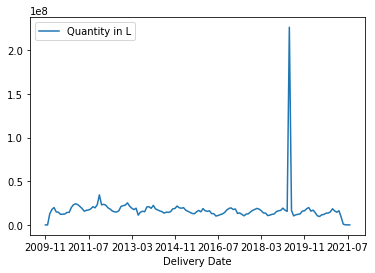

In [7]:
import matplotlib.pyplot as plt

grp_by_time.plot(x='Delivery Date', y='Quantity in L')
plt.show()